In [ ]:
! wget https://antidote.cloud/f/467bc9fab4da4d2da65f/?dl=1 -O img.jpg

--2023-11-17 19:15:09--  https://antidote.cloud/f/467bc9fab4da4d2da65f/?dl=1
Resolving antidote.cloud (antidote.cloud)... 193.30.122.219
Connecting to antidote.cloud (antidote.cloud)|193.30.122.219|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://antidote.cloud/seafhttp/files/864fd70d-1925-4f20-83a7-41c85488b743/img.jpg [following]
--2023-11-17 19:15:10--  https://antidote.cloud/seafhttp/files/864fd70d-1925-4f20-83a7-41c85488b743/img.jpg
Reusing existing connection to antidote.cloud:443.
HTTP request sent, awaiting response... 200 OK
Length: 75466 (74K) [image/jpeg]
Saving to: ‘img.jpg’

img.jpg             100%[===================>]  73.70K  --.-KB/s    in 0.09s   

2023-11-17 19:15:10 (813 KB/s) - ‘img.jpg’ saved [75466/75466]



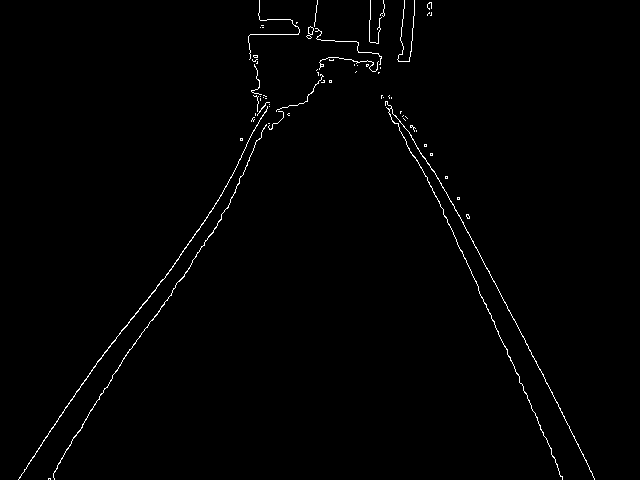

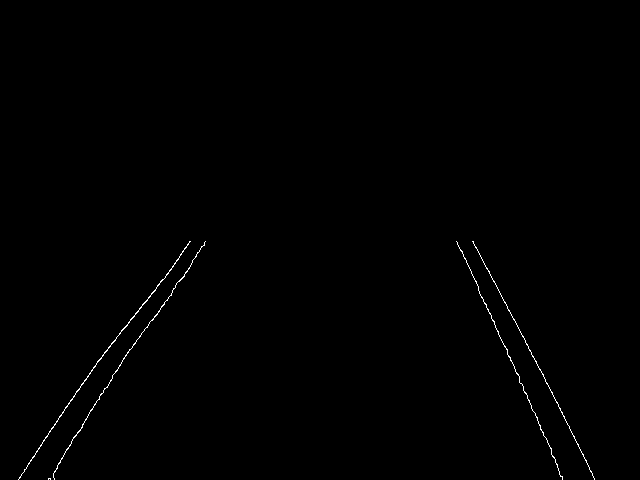

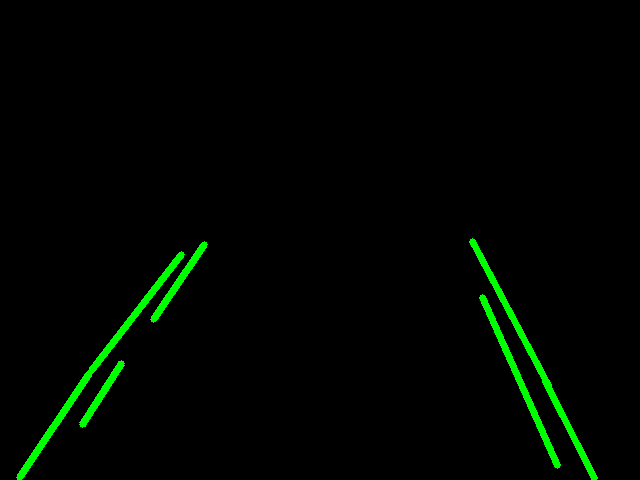

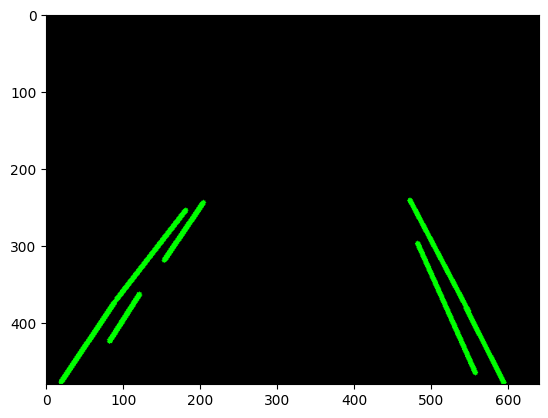

In [ ]:
# Import libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('img.jpg')

class im2angle:
    def __init__(self, img):
        self.frame = img
        self.height, self.width, self.channels = img.shape

    def edge_detection(self):
        hsv = cv2.cvtColor(self.frame, cv2.COLOR_BGR2HSV)
        lower_blue = np.array([80, 40, 40])
        upper_blue = np.array([150, 255, 255])
        mask = cv2.inRange(hsv, lower_blue, upper_blue)
        res = cv2.bitwise_and(self.frame, self.frame, mask)
        edgedet = cv2.Canny(mask, 100, 200)
        return edgedet

    def region_of_interest(self, edgedet):
        points = np.array([[(0, 0), (self.width, 0), (self.width, self.height//2), (0, self.height//2)]], np.int32)
        colorfill = cv2.fillPoly(edgedet, pts=[points], color=(0, 0, 0))
        return colorfill

    def hough_transform(self, cropped_edges):
        lines = cv2.HoughLinesP(cropped_edges, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
        line_image = np.zeros_like(self.frame)
        if lines is not None:
            for line in lines:
                for x1, y1, x2, y2 in line:
                    cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 5)
        return line_image

    def show_image(self, frame):
        cv2_imshow(frame)

# Corrected variable name 'img' and added import statement for plt
img = cv2.imread('img.jpg')
foo = im2angle(img)
edges = foo.edge_detection()
foo.show_image(edges)
cropped = foo.region_of_interest(edges)
foo.show_image(cropped)

# Integrate Hough transform into Code 1
hough_result = foo.hough_transform(cropped)
foo.show_image(hough_result)
plt.imshow(hough_result)
plt.show()